## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from features_selection import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_boston

In [4]:
data_boston = load_boston()

In [5]:
data_boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [6]:
print(data_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
data = pd.DataFrame(data=data_boston.data, columns = data_boston.feature_names)

In [8]:
data['target'] = data_boston.target

In [9]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
data.shape

(506, 14)

## EDA

In [11]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [15]:
X = data.drop('target',axis = 1)
y = data.target

In [16]:
fs = Features_Selection(X,y)

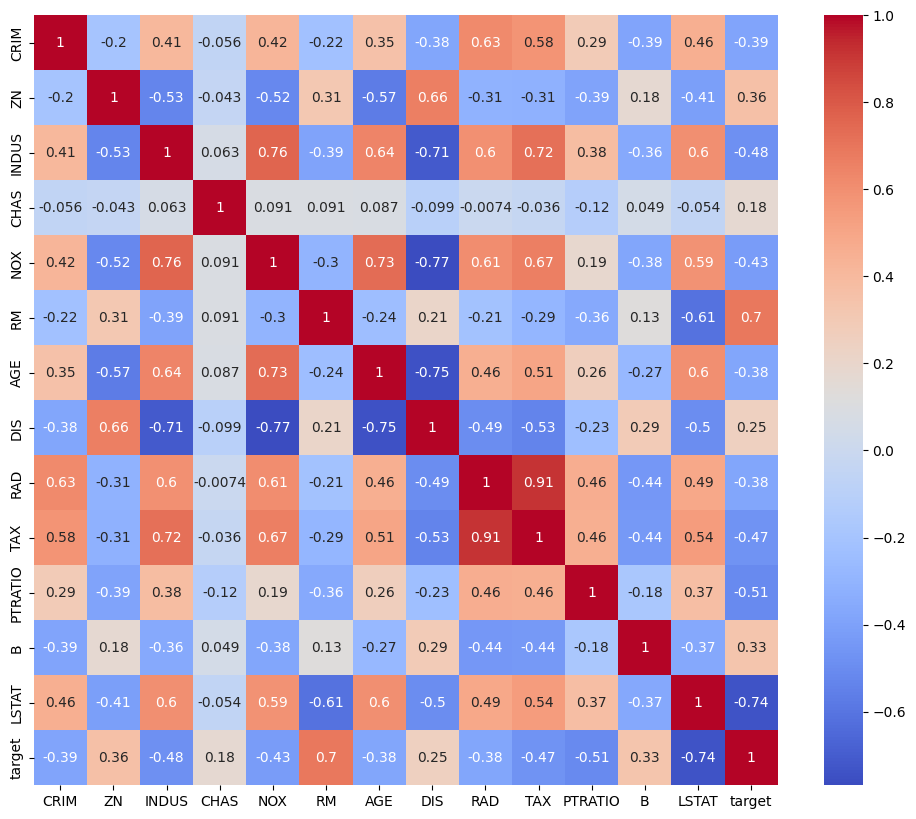

In [17]:
fs.corr_matrix_visual()

## Data Preprocessing

In [18]:
fs.const_features_selection(0.001)

Total Variable Features = 13
Total Constant Features = 0

All features have variance of more than 0.001.


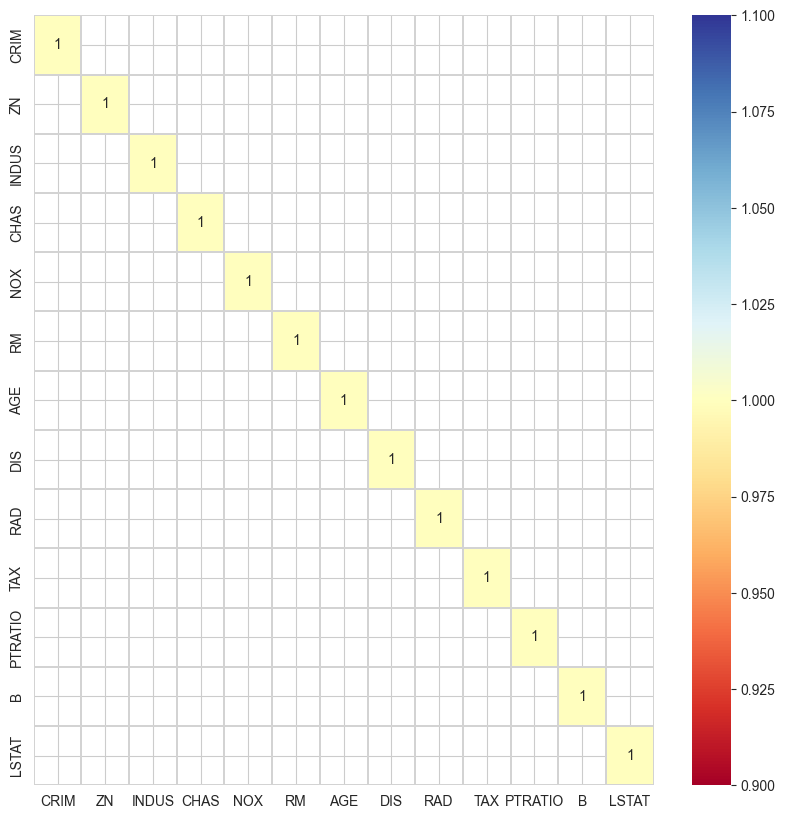

In [19]:
fs.features_corr_visual_filter(0.95)

In [20]:
fs.features_corr_filter(0.95)

All features have correlation of less than 0.95 with each other.


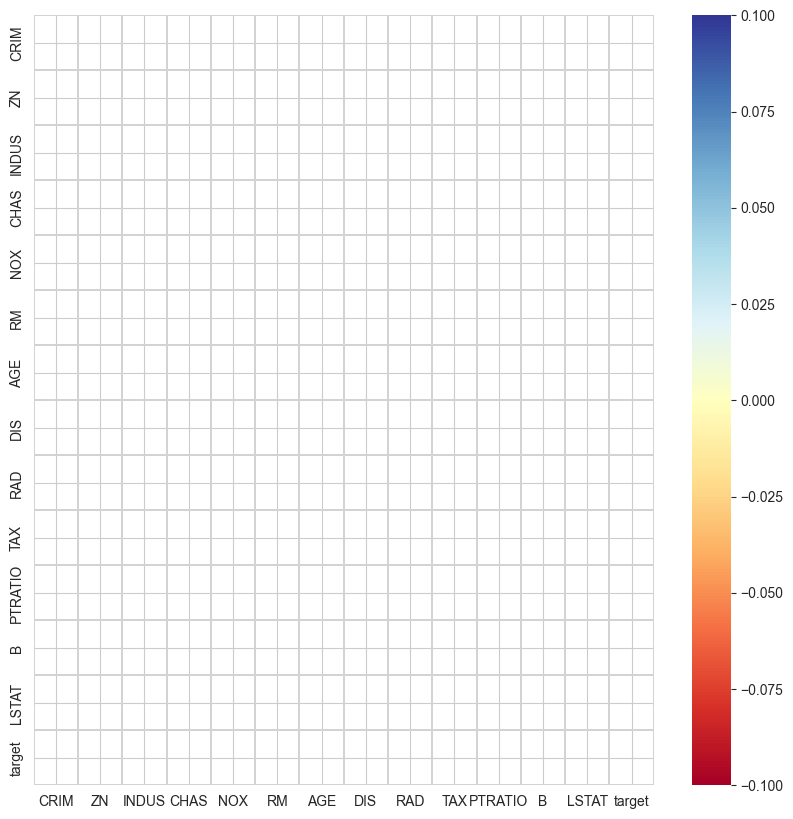

In [21]:
fs.features_corr_with_output_visual_filter(0.05)

In [22]:
fs.features_corr_with_output_filter(0.05)

All features have correlation of more than 0.05 with output.


In [23]:
# standardizing the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Train_Test_Split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,shuffle = True)

In [25]:
x_train.shape

(404, 13)

In [26]:
y_train.shape

(404,)

In [27]:
x_test.shape

(102, 13)

In [28]:
y_test.shape

(102,)

## Models Training with GridSearchCV

In [29]:
import pickle
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

def gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'ridge_regression': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 1.0, 10.0]
            }
        },
        'lasso_regression': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 1.0, 10.0]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gscv = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gscv.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gscv.best_score_,
            'best_params': gscv.best_params_
        })
        best_estimator = gscv.best_estimator_
        pickle.dump(best_estimator, open(f'{algo_name}_model.p', 'wb'))

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [30]:
stats = gridsearchcv(x_train,y_train)

In [31]:
stats

,model,best_score,best_params
0,linear_regression,0.725672,{'fit_intercept': True}
1,ridge_regression,0.728127,{'alpha': 10.0}
2,lasso_regression,0.719332,{'alpha': 0.1}


### Model Evaluation

### Assumptions for analyzing model performance
1) The scatter plot comparing the true values (y-true) with the predicted values (y-predict) should exhibit a linear relationship.
2) The residuals should follow a normal distribution with a mean approximately equal to zero.
3) There should be uniform distributions observed between the scatter plot of predictions and residuals.

#### Linear Regression Model Evaluation

In [32]:
with open('linear_regression_model.p', 'rb') as file:
    model1 = pickle.load(file)

##### scatter plot between truth vs predictions

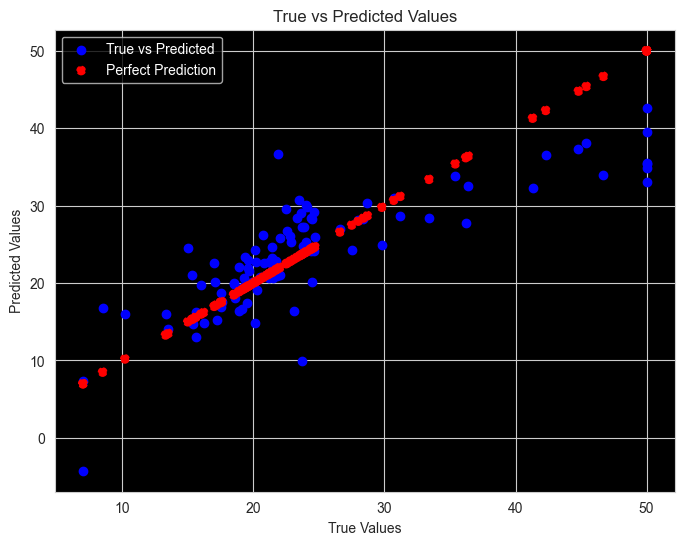

In [33]:
y_true = list(y_test)
y_predict = list(model1.predict(x_test))
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_predict, color='blue', label='True vs Predicted')
plt.scatter(y_true, y_true, color='red', linestyle='--', label='Perfect Prediction')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
legend = plt.legend()
plt.setp(legend.get_texts(), color='white')
plt.grid(True)
plt.show()

##### residuals distribution

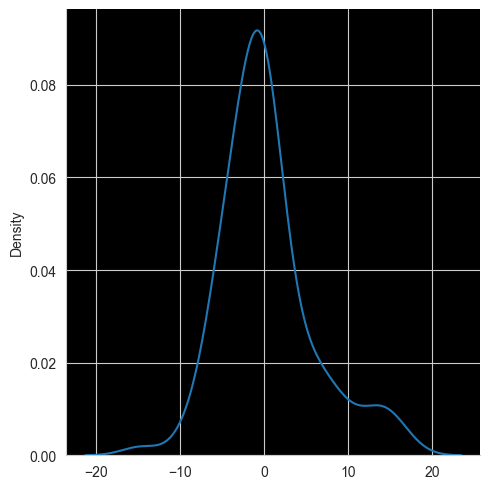

In [34]:
residuals = np.array(y_true)-np.array(y_predict)
sns.displot(residuals,kind='kde')

##### scatter plot between residuals and predictions

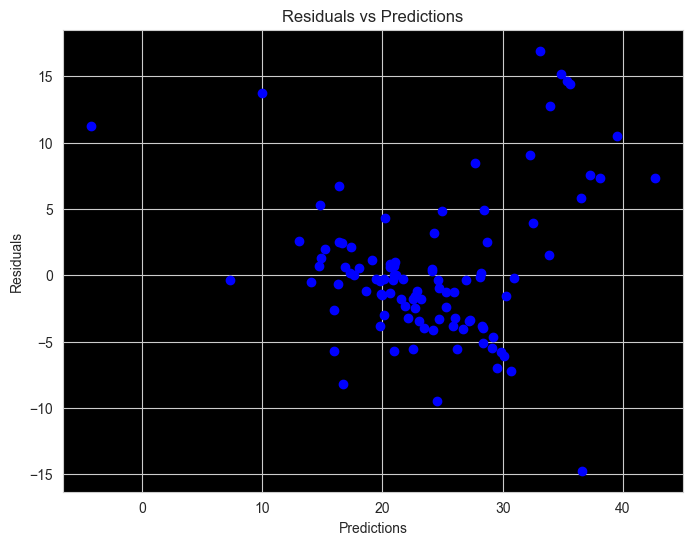

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(y_predict, residuals, color='blue', label='True vs Predicted')
plt.title('Residuals vs Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [36]:
print(f"Mean Absolute Error (MAE) : {mean_absolute_error(y_true,y_predict)}")
print(f"Mean Squared Error (MSE) : {mean_squared_error(y_true,y_predict)}")
print(f"Root Mean Squared Error (RMSE) : {np.sqrt(mean_squared_error(y_true,y_predict))}")
print(f"R Squared : {r2_score(y_true,y_predict)}")

Mean Absolute Error (MAE) : 3.850063715523071
Mean Squared Error (MSE) : 30.148043318805918
Root Mean Squared Error (RMSE) : 5.490723387569794
R Squared : 0.6728445593992645


#### Ridge Regression Model Evaluation

In [37]:
with open('ridge_regression_model.p', 'rb') as file:
    model2 = pickle.load(file)

##### scatter plot between truth vs predictions

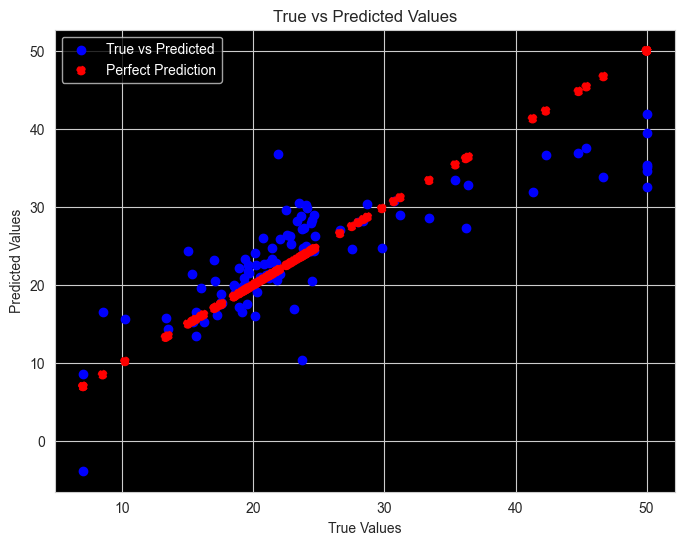

In [38]:
y_true = list(y_test)
y_predict = list(model2.predict(x_test))
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_predict, color='blue', label='True vs Predicted')
plt.scatter(y_true, y_true, color='red', linestyle='--', label='Perfect Prediction')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
legend = plt.legend()
plt.setp(legend.get_texts(), color='white')
plt.grid(True)
plt.show()

##### residuals distribution`

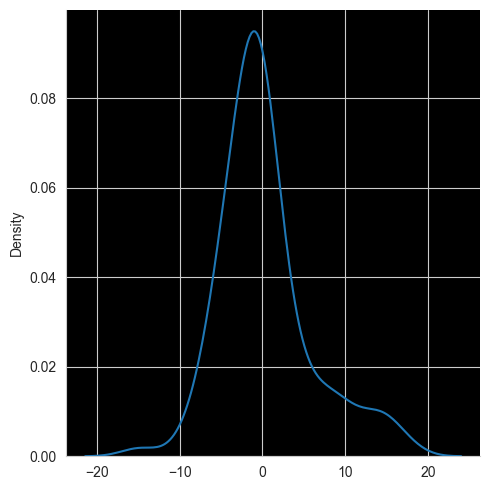

In [39]:
residuals = np.array(y_true)-np.array(y_predict)
sns.displot(residuals,kind='kde')

In [40]:
##### scatter plot between residuals and predictions

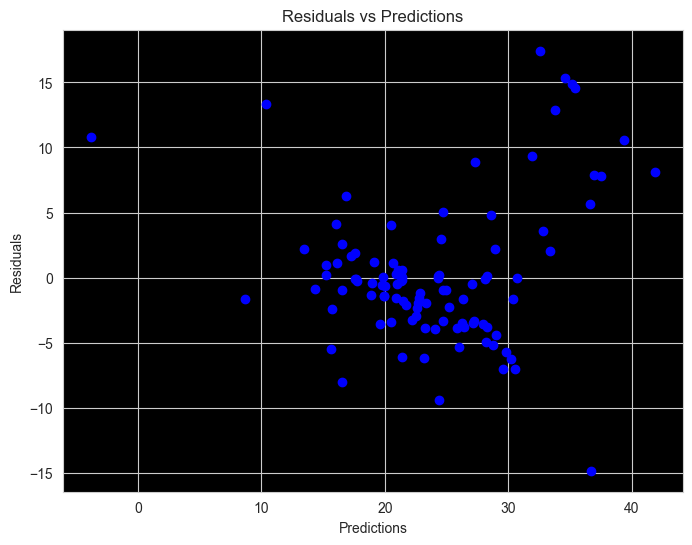

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(y_predict, residuals, color='blue', label='True vs Predicted')
plt.title('Residuals vs Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [42]:
print(f"Mean Absolute Error (MAE) : {mean_absolute_error(y_true,y_predict)}")
print(f"Mean Squared Error (MSE) : {mean_squared_error(y_true,y_predict)}")
print(f"Root Mean Squared Error (RMSE) : {np.sqrt(mean_squared_error(y_true,y_predict))}")
print(f"R Squared : {r2_score(y_true,y_predict)}")

Mean Absolute Error (MAE) : 3.8164833993631486
Mean Squared Error (MSE) : 30.318394251005078
Root Mean Squared Error (RMSE) : 5.506214148669217
R Squared : 0.6709959739474319


#### Lasso Regression Model Evaluation

In [43]:
with open('lasso_regression_model.p', 'rb') as file:
    model3 = pickle.load(file)

In [44]:
##### scatter plot between truth vs predictions

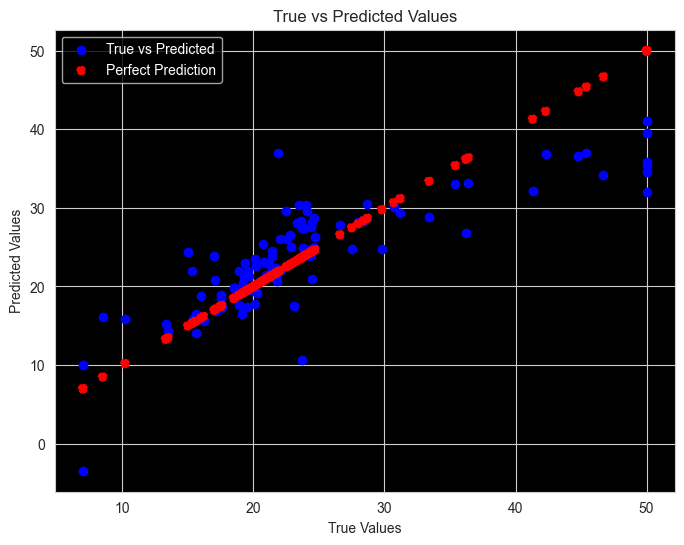

In [45]:
y_true = list(y_test)
y_predict = list(model3.predict(x_test))
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_predict, color='blue', label='True vs Predicted')
plt.scatter(y_true, y_true, color='red', linestyle='--', label='Perfect Prediction')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
legend = plt.legend()
plt.setp(legend.get_texts(), color='white')
plt.grid(True)
plt.show()

In [46]:
##### residuals distribution`

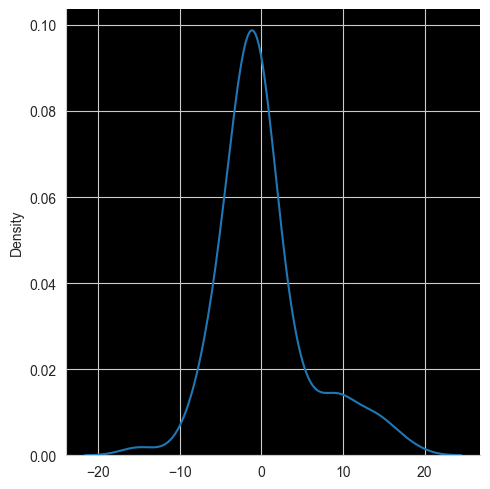

In [47]:
residuals = np.array(y_true)-np.array(y_predict)
sns.displot(residuals,kind='kde')

In [48]:
##### scatter plot between residuals and predictions

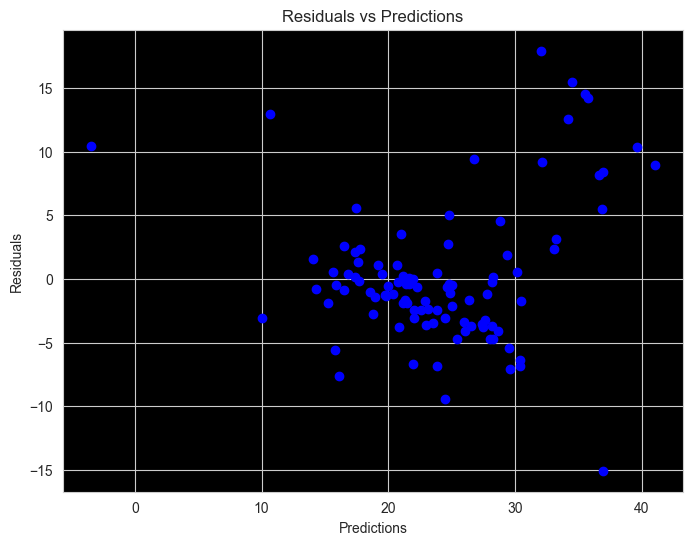

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(y_predict, residuals, color='blue', label='True vs Predicted')
plt.title('Residuals vs Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [50]:
print(f"Mean Absolute Error (MAE) : {mean_absolute_error(y_true,y_predict)}")
print(f"Mean Squared Error (MSE) : {mean_squared_error(y_true,y_predict)}")
print(f"Root Mean Squared Error (RMSE) : {np.sqrt(mean_squared_error(y_true,y_predict))}")
print(f"R Squared : {r2_score(y_true,y_predict)}")

Mean Absolute Error (MAE) : 3.7876438128011034
Mean Squared Error (MSE) : 30.02711102189087
Root Mean Squared Error (RMSE) : 5.479699902539451
R Squared : 0.6741568720578914


## Comments

Thus all the three models are giving almost same performance, so linear regression model will later be chosen for deployement